<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import math
from tqdm import tqdm

<font color='red'>Creating custom dataset</font>

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))



## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initialize the weight_vector and intercept term to zeros </font>

* Create a loss function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [10]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #we use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    
    w = np.zeros_like(dim)
    b = 0

    return w,b

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [13]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return

    return (1/(1+ np.exp(-z)))

#val1 = sigmoid(2)
#print(val1)

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [15]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''

    loss= -np.mean([y_true[i]*np.log10(y_pred[i])+ (1-y_true[i])*np.log10(1-y_pred[i]) for i in range(len(y_true))])
    
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [17]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    #dw=(x*(y-sigmoid((w.T)*x+b)-(alpha/N)*w))
    dw =x*(y-sigmoid(np.dot(w,x)+b)) - ((alpha*w)/N)
    
    return dw


<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [19]:
 def gradient_db(x,y,w,b):
        '''In this function, we will compute gradient w.r.to b '''
        
        db = y-sigmoid(np.dot(w,x)+b)
        
        return db

<font color='blue'> Implementing logistic regression</font>

In [37]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    
    w,b = initialize_weights(X_train[0])
    N = len(X_train)
    
    train_loss = []
    test_loss = []

    for e in tqdm(range(epochs)):
        for j in range(len(X_train)):
            
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            
            w = w + (eta0 * dw)       # updating W and b
            b = b + (eta0 * db)
        
        y_train_pred = sigmoid(np.dot(X_train,w)+b)    # predicting y train and test
        y_test_pred = sigmoid(np.dot(X_test,w)+b)
        
        train = logloss(X_train, y_train_pred)
        train_loss.append(train)                      # train and test loss for updated w,b for each epoch
        
        test=logloss(X_test, y_test_pred)
        test_loss.append(test)
        
    return w,b,train_loss,test_loss

In [51]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=14
w,b,trainloss,testloss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:14<00:00,  1.03s/it]


In [52]:
w,b

(array([-0.89482323,  0.63922609, -0.07409042,  0.63113611, -0.38279876,
         0.9346933 , -0.89664514, -0.07124397,  0.41113377,  0.41550075,
         0.24845771,  0.05300616, -0.08703024,  0.53952896,  0.06749254]),
 -1.3030058566516545)

# <font color='red' size=5>SGD classifier with SKlearn</font>

In [7]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.coef_, clf.coef_.shape, clf.intercept_

#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

<font color='red' size=5>Goal</font>
* Compare our custom implementation and SKlearns SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [53]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_ , b-clf.intercept_

(array([[-4.75139040e-03,  7.60245639e-03,  1.85102713e-03,
          6.50362355e-05,  1.54498740e-03,  2.34086809e-03,
         -9.09928936e-04,  2.16124544e-03,  5.21959720e-03,
         -4.49834999e-03,  1.23628554e-03,  2.54417563e-03,
          1.74962845e-03, -1.28756176e-03,  1.05365463e-03]]),
 array([0.00279952]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

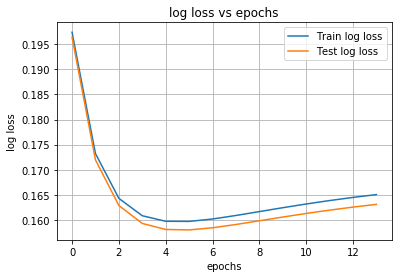

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), trainloss, label = "Train log loss")
plt.plot(range(epochs), testloss, label = "Test log loss")

plt.legend()
plt.xlabel("epochs")
plt.ylabel("log loss")
plt.title("log loss vs epochs")
plt.grid()
plt.show()

In [55]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5:  # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9505866666666667
0.9476
